<h1> Exploratory Data Analysis </h1>

<h1> 1 : Setting Up </h1> 

Import all neccessary libraries

In [1]:
import numpy as np
import matplotlib as mp
import pandas as pd
import sqlite3 as sql
import seaborn as sns

from matplotlib import pyplot
from pandas.plotting import scatter_matrix

Make a connection to the database: survive

In [2]:
database = "data/survive.db"
connection = sql.connect( database )

Setup the query statement to extract all data from the database. Store into variable called "surviveDataset"

In [3]:
query = "SELECT * FROM survive"
#Extract the dataset
surviveDataset = pd.read_sql_query( query, connection )

<h1> 2 : Understanding The Data </h1>

Here we can see that there are 15000 instances with 16 attributes.

In [4]:
print( surviveDataset.shape )

(15000, 16)


Here, we take a look at the leading 5 entries and last 5 entries to see what this dataset entails. Upon first impression, this dataset tells us certain characteristics of these patients and whether they survive. There are some attributes that are not required.

For example, the attribute: "Favorite color" is irrelevant as a patient's favorite color does not affect the fatality rates.

There are also some data that appears to be erroneous, for example, patient ID: ZK6PAC has an age of -60. This data is wrong as nobody has an age that is negative.

In [5]:
print( surviveDataset.head( ) )

       ID Survive  Gender Smoke      Diabetes  Age Ejection Fraction  Sodium  \
0  TIG1GE       0    Male   Yes        Normal   50               Low     141   
1  VXUCV9       1    Male    No        Normal   75               Low     134   
2  AFH4F1       1  Female    No  Pre-diabetes   80               Low     135   
3  ZK6PAC       0    Male    No        Normal  -60               Low     136   
4  6CVBRT       0  Female    No        Normal   70               Low     141   

   Creatinine  Pletelets  Creatinine phosphokinase  Blood Pressure  \
0         0.7   266000.0                       185             105   
1         2.5   224000.0                        99             162   
2         1.3   192000.0                       776             179   
3         0.9   228000.0                      2261             136   
4         0.9   358000.0                      1202             171   

   Hemoglobin  Height  Weight Favorite color  
0        12.3     180      93          green  
1   

In [6]:
print( surviveDataset.tail( ) )

           ID Survive  Gender Smoke Diabetes  Age Ejection Fraction  Sodium  \
14995  91MBFV       0    Male   Yes   Normal   50               Low     140   
14996  3BK9WM       1    Male   Yes   Normal   62               Low     140   
14997  01ZP6F       0  Female    No   Normal   61               Low     141   
14998  JMSGEG       0    Male    No   Normal   77               Low     137   
14999  16DJV7       1    Male    No   Normal   45               Low     135   

       Creatinine  Pletelets  Creatinine phosphokinase  Blood Pressure  \
14995         0.9   362000.0                       298             109   
14996         0.9   253000.0                       231             141   
14997         0.9   229000.0                        84             173   
14998         1.1   406000.0                       109             154   
14999         1.6   126000.0                       582             143   

       Hemoglobin  Height  Weight Favorite color  
14995        11.8     178    

In [7]:
print( surviveDataset.describe( ) )

                Age        Sodium    Creatinine     Pletelets  \
count  15000.000000  15000.000000  14501.000000   15000.00000   
mean      57.428467    136.604267      1.410195  263096.01649   
std       23.411173      4.364890      1.044535   98056.33034   
min      -95.000000    113.000000      0.500000   25100.00000   
25%       50.000000    134.000000      0.900000  211000.00000   
50%       60.000000    137.000000      1.100000  262000.00000   
75%       70.000000    140.000000      1.400000  304000.00000   
max       95.000000    148.000000      9.400000  850000.00000   

       Creatinine phosphokinase  Blood Pressure    Hemoglobin        Height  \
count              15000.000000    15000.000000  15000.000000  15000.000000   
mean                 580.151800      103.676667     12.910667    159.475200   
std                  955.418765       39.700138      2.500152     17.344439   
min                   23.000000       40.000000      9.000000    130.000000   
25%                

Here we take a look at the unique values below for the dataset. Here we can see more errors with the dataset.

1: "Survive" attribute should only have 2 types of data. 1 (Survive) or 0 (Did Not Survive). However, here we can see that there are 4 types of data. This would mean that there is a presence of erroneous dta.

2: "Smoke" attribute, like "Survive" should also only have 2 types of data. Yes or No. Likewise, this indicates presence of erroneous data.

In [8]:
print( surviveDataset.nunique( ) )

ID                          14042
Survive                         4
Gender                          2
Smoke                           4
Diabetes                        3
Age                            87
Ejection Fraction               5
Sodium                         27
Creatinine                     40
Pletelets                     176
Creatinine phosphokinase      208
Blood Pressure                139
Hemoglobin                     86
Height                         60
Weight                        123
Favorite color                  6
dtype: int64


Lets take a closer look at the attributes that seem to have erroneous data.

Upon taking a closer look, the data entered for these 2 attributes are correct. For example, for "Survive", the expect data should be 0 or 1. However, there are some entries that indicate "No" or "Yes". Though these data are correct, they should be standardized into a certain format. 

Another example would be that for whether a patient smokes, the response should be either Yes or No. However, some entries are all in uppercase. One recommendation would be to standardize "Yes" or "No" answers to 1 or 0. Using binary to capture Yes/No answers would help to reduce errors as they are not susceptible to casing mistakes.

In [9]:
print( surviveDataset[ 'Smoke' ].unique( ) )

['Yes' 'No' 'NO' 'YES']


In [10]:
print( surviveDataset[ 'Survive' ].unique( ) )

['0' '1' 'No' 'Yes']


<h1> 3 : Data Cleaning </h1>

<h2> 3.A : Remove "Favorite Color" </h2>

First, lets remove "Favorite Color" from the dataset and verify if we have successfully removed the above mentioned attribute.

In [11]:
surviveDataset = surviveDataset.drop( [ 'Favorite color' ], axis=1 )

Lets print out the dataset again to check if 'Favourite color' attribute has been removed

In [12]:
print( "Current Shape: " )
print( surviveDataset.shape )
print( "\nPrint Unique Values: " )
print( surviveDataset.nunique( ) )

Current Shape: 
(15000, 15)

Print Unique Values: 
ID                          14042
Survive                         4
Gender                          2
Smoke                           4
Diabetes                        3
Age                            87
Ejection Fraction               5
Sodium                         27
Creatinine                     40
Pletelets                     176
Creatinine phosphokinase      208
Blood Pressure                139
Hemoglobin                     86
Height                         60
Weight                        123
dtype: int64


<h2> 3.B : Remove NULL values </h2>

We have successfully removed the attribute 'favorite color' from the dataset. Next, lets check for any "NULL" values that exists within the dataset. 

In [13]:
print( surviveDataset.isnull( ).sum( ) )

ID                            0
Survive                       0
Gender                        0
Smoke                         0
Diabetes                      0
Age                           0
Ejection Fraction             0
Sodium                        0
Creatinine                  499
Pletelets                     0
Creatinine phosphokinase      0
Blood Pressure                0
Hemoglobin                    0
Height                        0
Weight                        0
dtype: int64


In the example above, there are 499 null values under the attribute "Creatine". 

In [14]:
print( surviveDataset[ 'Creatinine' ].unique( ) )

[0.7  2.5  1.3  0.9  1.1  1.7  0.75 1.2  0.8  1.18 1.8  1.    nan 2.3
 1.4  1.83 3.5  3.8  1.9  2.2  9.   2.   2.7  1.6  9.4  5.8  1.5  2.9
 2.1  0.6  6.1  4.4  4.   2.4  0.5  3.4  5.   3.   6.8  3.7  3.2 ]


Upon closer look, we can see that some values are not a number (nan). We should first determine whether the creatinine values of a patient affects coronary artery diseases. If the values do not have any relation, we can leave the values alone. 

A quick google check would show that serum creatinine in a patients blood does indeed contribute to coronary artery disease. As such, we should drop these errnoneous/null datas from the dataset.

In [15]:
#Drop all the null values from the dataset
surviveDataset = surviveDataset.dropna( )

In [16]:
print( surviveDataset.shape )

(14501, 15)


The null values have been successfully dropped from the dataset. A total of 499 entries have been removed (15000 - 14501 = 499) which matches the amount of null values found in the previous steps

In [17]:
print( surviveDataset.isnull( ).sum( ) )

ID                          0
Survive                     0
Gender                      0
Smoke                       0
Diabetes                    0
Age                         0
Ejection Fraction           0
Sodium                      0
Creatinine                  0
Pletelets                   0
Creatinine phosphokinase    0
Blood Pressure              0
Hemoglobin                  0
Height                      0
Weight                      0
dtype: int64


No more null values as verified below.

Lets take a look at the values in the creatinine attribute to ensure that the erronous data has been dropped

In [18]:
print( surviveDataset[ 'Creatinine' ].unique( ) )

[0.7  2.5  1.3  0.9  1.1  1.7  0.75 1.2  0.8  1.18 1.8  1.   2.3  1.4
 1.83 3.5  3.8  1.9  2.2  9.   2.   2.7  1.6  9.4  5.8  1.5  2.9  2.1
 0.6  6.1  4.4  4.   2.4  0.5  3.4  5.   3.   6.8  3.7  3.2 ]


NULL data values have been removed from the dataset.

<h2> 3.C : Standardizing 'Smoke' and 'Survive' values </h2>

In section 2, we found that although the data values are correct for 'Smoke' and 'Survive', the data representations are not standardize.

Base on the recommendation, we will change all "Yes/No" values to 1 or 0.

In [19]:
#Change "YES/Yes" to "1"
surviveDataset['Smoke'].mask(surviveDataset['Smoke'] == 'YES', '1', inplace=True)
surviveDataset['Smoke'].mask(surviveDataset['Smoke'] == 'Yes', '1', inplace=True)
#Change "NO/No" to "0"
surviveDataset['Smoke'].mask(surviveDataset['Smoke'] == 'NO', '0', inplace=True)
surviveDataset['Smoke'].mask(surviveDataset['Smoke'] == 'No', '0', inplace=True)

#Change "YES/Yes" to "1"
surviveDataset['Survive'].mask(surviveDataset['Survive'] == 'Yes', '1', inplace=True)
#Change "NO/No" to "0"
surviveDataset['Survive'].mask(surviveDataset['Survive'] == 'No', '0', inplace=True)

In [20]:
print( "Smoke Dataset Values:" )
print( surviveDataset[ 'Smoke' ].unique( ) )
print( "Survive Dataset Values:" )
print( surviveDataset[ 'Survive' ].unique( ) )

Smoke Dataset Values:
['1' '0']
Survive Dataset Values:
['0' '1']


In [21]:
print( surviveDataset.nunique( ) )

ID                          13614
Survive                         2
Gender                          2
Smoke                           2
Diabetes                        3
Age                            87
Ejection Fraction               5
Sodium                         27
Creatinine                     40
Pletelets                     176
Creatinine phosphokinase      208
Blood Pressure                139
Hemoglobin                     86
Height                         60
Weight                        123
dtype: int64


We have successfully standardized the data for 'Smoke' and 'Survive'. From the unique values printed above, 'Survive' and 'Smoke' now only have 2 unique value types or 1 or 0.

<h2> 3.D Standardizing "Ejection Fraction" Values </h2>

It is also noticed that "Ejection Fraction" (also known as strength of heart) should vary between low, normal and high. But there are 5 unique values.

In [22]:
print( "Ejection Fraction Values:" )
print( surviveDataset[ 'Ejection Fraction' ].unique( ) )

Ejection Fraction Values:
['Low' 'Normal' 'High' 'L' 'N']


We can see that whilst 'L' and 'N' are correct entries, they are not standardized. Lets standardize 'L' and 'N' to 'Low' and 'Normal'

In [23]:
#Change "L" to "Low"
surviveDataset['Ejection Fraction'].mask(surviveDataset['Ejection Fraction'] == 'L', 'Low', inplace=True)
#Change "N" to "Normal"
surviveDataset['Ejection Fraction'].mask(surviveDataset['Ejection Fraction'] == 'N', 'Normal', inplace=True)

In [24]:
print( "Ejection Fraction Values:" )
print( surviveDataset[ 'Ejection Fraction' ].unique( ) )

Ejection Fraction Values:
['Low' 'Normal' 'High']


<h2> 3.E Removing Negative Age Values </h2>

In section 2, we also found that some of the ages are negative. There is no such thing as a negative age. Although there is a possibility there it was a typo and -60 could very well mean 60 years old, we shall not assume that the data is correct. Hence, we shall remove the age entries that are negative,

In [25]:
#Remove all ages that are negative
surviveDataset = surviveDataset.drop( surviveDataset[ surviveDataset.Age < 0 ].index )

#Print out all the ages and ensure there are no negative values
print( surviveDataset.groupby('Age').size( ) )

Age
40     327
41      44
42     325
43      38
44      88
45     887
46     144
47      49
48      97
49     166
50    1293
51     164
52     221
53     475
54      77
55     788
56      48
57      94
58     529
59     190
60    1636
61     190
62     221
63     345
64     154
65    1241
66      88
67      80
68     220
69     162
70    1197
72     331
73     200
75     530
77     106
78      95
79      49
80     335
81      45
82     126
85     288
86      60
87      48
90     159
94      54
95      83
dtype: int64


<h2> 3.E: Checking For Outliers </h2>

Here, lets perform a simple check for any outliers within the dataset. Outliers are samples which are quite distinct from the rest of the instances. 

When describing the dataset, 2 attributes stood out as having a very high deviation standard. "Pletelets" and "Creatinine phosphokinase".

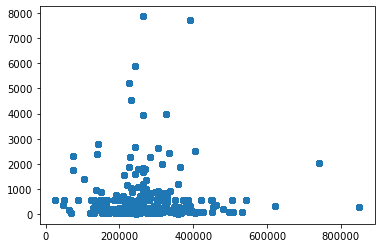

In [26]:
pletelets = surviveDataset[ 'Pletelets' ]
creatininePhosphokinase = surviveDataset[ 'Creatinine phosphokinase' ]

#Print the scatter plot of:
#Pletelets ( x-axis ) vs Creatinine phosphokinase ( y-axis )
pyplot.scatter( pletelets, creatininePhosphokinase )
pyplot.show( )

Using the scatter plot above, we can see that for "Pletelets", there seems to be a small set of outlier values that are above 650,000. 

Wherease for "Creatinine phosphokinase", the outlier values are above the range of 7500.

We have to go deeper in depth to verify whether these outliers are global outliers. That is, these events occur extremely rarely and could be a result of human error during data entry.

To go deeper in depth, we shall find out how many cases of patients meet the outlier conditions mentioned above.

In [27]:
print( "Size Of : Pletelets" )
print( surviveDataset.groupby('Pletelets').size( ) )
print( "\nSize Of : Creatinine phosphokinase" )
print( surviveDataset.groupby('Creatinine phosphokinase').size( ) )

Size Of : Pletelets
Pletelets
25100.0     42
47000.0     42
51000.0     40
62000.0     60
70000.0     54
            ..
533000.0    38
543000.0    54
621000.0    54
742000.0    43
850000.0    52
Length: 176, dtype: int64

Size Of : Creatinine phosphokinase
Creatinine phosphokinase
23       43
30       37
47      162
52       45
53       51
       ... 
4540     45
5209     48
5882     38
7702     46
7861     47
Length: 208, dtype: int64


Upon printing out the number of cases for "Pletelets" and "Creatinine phosphokinase", it is discovered that although the outlier values mentioned above do not fall into a particular range, the frequency in which it occurs isnt that unique. 

Wherein to say that for example: Although the typical range for pletelets ranges within 100,000 - 500,000, the number of cases that appear beyond that range is the same as the number of cases within the normal range. There are 52 cases with a pletelet count of 850,000. That does not deviate that much from the standard cases of 40 to 60 cases from pletelet counts of 70,000 to 550,000.

This means that it is truly possible to have an outlier count for the abovementioned 2 attributes and not be a human error/mistake.

Thus, we do not have to remove these datas from the dataset.

<h2> 3.F : Final Checks </h2>

After cleaning up the data, lets do a final check on our dataset. 

In [28]:
print( "Current Shape: " )
print( surviveDataset.shape )
print( "\nPrint Unique Values: " )
print( surviveDataset.nunique( ) )
print( "\nPrint Description:" )
print( surviveDataset.describe( ) )

Current Shape: 
(14087, 15)

Print Unique Values: 
ID                          13248
Survive                         2
Gender                          2
Smoke                           2
Diabetes                        3
Age                            46
Ejection Fraction               3
Sodium                         27
Creatinine                     40
Pletelets                     176
Creatinine phosphokinase      208
Blood Pressure                139
Hemoglobin                     86
Height                         60
Weight                        123
dtype: int64

Print Description:
                Age        Sodium    Creatinine      Pletelets  \
count  14087.000000  14087.000000  14087.000000   14087.000000   
mean      60.984028    136.578406      1.409504  262931.190133   
std       11.908108      4.383076      1.041478   98100.044622   
min       40.000000    113.000000      0.500000   25100.000000   
25%       51.000000    134.000000      0.900000  211000.000000   
50%       

<h1> 4 : Relationship Analysis </h1>

Here, we shall start analyzing the relation between the attributes and if there is any correlation between the attributes and whether a patient survives.

Lets start by getting the co-relation table to visualize the relation between each attributes.

<AxesSubplot:>

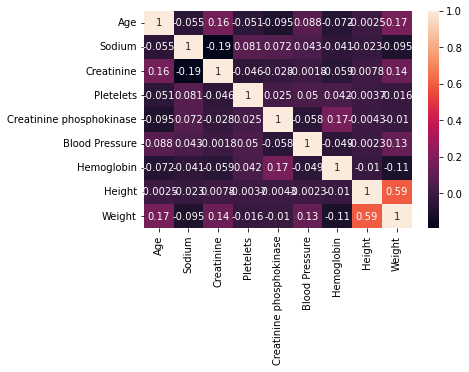

In [29]:
correlation = surviveDataset.corr( )
sns.heatmap( correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True )

From the co-relation table above, we can see there is a high co-relation between the height and weight. We shall start by determining whether height/weight affects the survivability of the patient.

<h2> 4.A : Height vs Weight </h2>

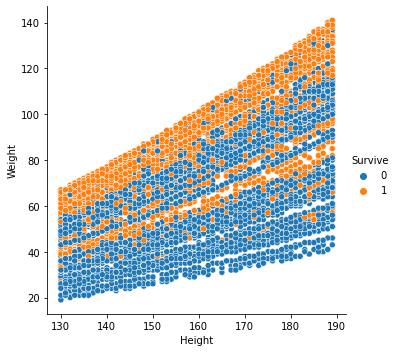

In [30]:
sns.relplot( x='Height', y='Weight', hue='Survive', data=surviveDataset )

From the relationship plot above, one relationship we could see is that the higher your weight and height, the chances of survival increases. There is a large concentration of patients that survives with a weight of >60kg and increases in relation to the height. It is interesting to note also that patients with very light weight in relation to their height tend not to survive. This means to say that taller patients with lower weight has a higher fatality count.

<h2> 4.B : Age vs Weight </h2>

Next, lets look at the relationship between a patients age and weight.

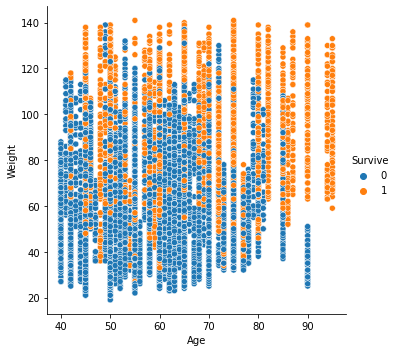

In [31]:
sns.relplot( x='Age', y='Weight', hue='Survive', data=surviveDataset )

There is a high concentration of fatality for diagnosed coronary artery disease (CAD) patients below the age of 70 with a lower weight of <80.

This chart seems to indicate that younger CAD patients with lower weight tend to have a higher fatality count

<h2> 4.C : Age vs Smoke </h2>

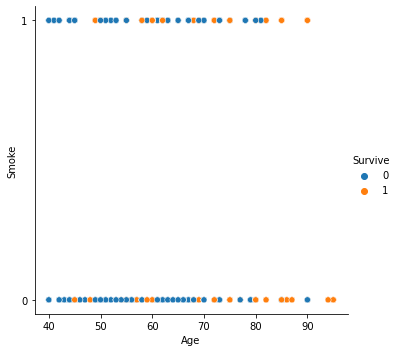

In [32]:
sns.relplot( x='Age', y='Smoke', hue='Survive', data=surviveDataset )

There is a high fatality rate amongst patients below the age of 70 that do not smoke as compared to patients that smoke. In fact, the data seems to suggest that older patients that smoke seems to have a higher survival rate.

<h2> 4.D : Gender vs Age </h2>

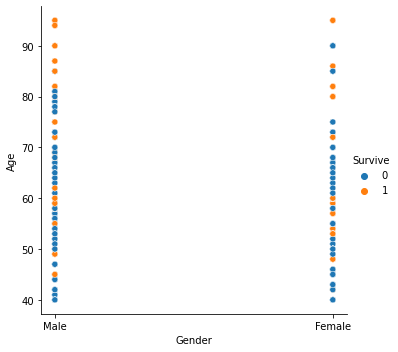

In [33]:
sns.relplot( x='Gender', y='Age', hue='Survive', data=surviveDataset )

We can see that there is a similiar pattern of higher fatality rate amongst the younger patients regardless of gender.

<h2> 4.E : Ejection Fraction vs Blood Pressure </h2>

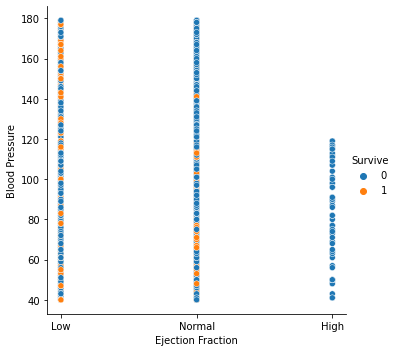

In [34]:
sns.relplot( x='Ejection Fraction', y='Blood Pressure', hue='Survive', data=surviveDataset )

This chart seems to indicate that patients with a high heart strength do not survive CAD whereas more patients with a low heart strength survive CAD.

<h2> 4.F : Hemoglobin vs Creatinine phosphokinase </h2>

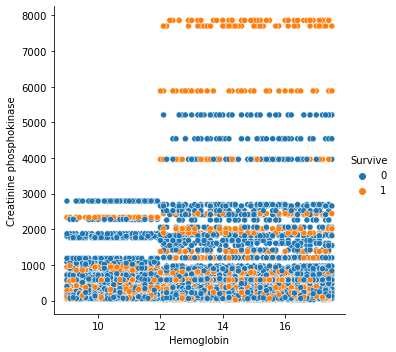

In [35]:
sns.relplot( x='Hemoglobin', y='Creatinine phosphokinase', hue='Survive', data=surviveDataset )

The chart seems to indicate that patients with a lower Creatinine phosphokinase count seem to have a higher fatality count

<h2> 4.G : Age vs Diabetes </h2>

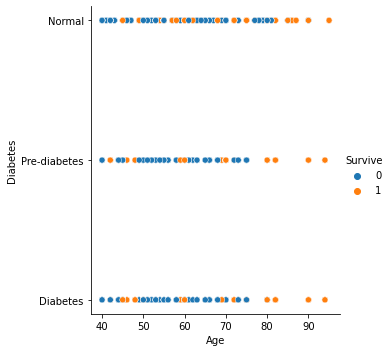

In [36]:
sns.relplot( x='Age', y='Diabetes', hue='Survive', data=surviveDataset )

The data above also seems to suggest that older patients survive CAD regardless of whether they have diabetes.

<h1> 5 : Conclusion </h1>

Looking at the "survive" database and analyzing it's data, it seems to indicate 2 possibilities:

<h2> This database seems to be inaccurate in it's reporting </h2>

Taking a closer look, it is highly likely that the attribute "Survive" is inverted. Where the data should be 1=Did not survive and 0=Survive.

A quick check on the internet would show that age, heart strength, smoking habits and blood pressure does have a direct relationship to the fatality rates amongst CAD patients. Where for example, older patients who smoke having a higher fatality rate. But this data seems to indicate otherwise where old patients who smoke always survives CAD.

I would suggest relooking into the dataset and ensuring that the attribute "Survive" is indeed reflected accurately before this dataset is used to predict treatments for CAD patients.

<h2> Data is correct but more data is needed </h2>

For example, the trend seems to indicate that old patients have a higher survivability rate. Looking at real life, it is possible as people who live till an old age typically tend to have healthier bodies when they were younger. Or they were only recently diagnosed with this disease due to an aging body. Thus, these older patients have not yet succumbed to the disease. Whereas younger patients who were diagnosed with CAD could have been living with this disease for a longer time and thus increasing their chances of death due to CAD.

More data may be needed, for example, one data could be captured which is the date of diagnosis. Which could help determine how long the patient has been living with CAD.

Another data needed is probably to clarify whether a "Survive" meant that the patient is still alive or it could also mean that CAD did not kill the patient but other diseases did. For example, a 90year old patient could have CAD but probably died of cancer. So in this case, does it mean that the patient "survived" CAD?